In [1]:
import numpy as np
from sklearn.datasets import california_housing
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from matplotlib.pylab import plt
from utils import *
%matplotlib inline
from pystacknet.pystacknet import StackNetRegressor

In [3]:
data=california_housing.fetch_california_housing()
x=data.data
y=data.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2121)

====================== Start of Level 0 ======================
Input Dimensionality 8 at Level 0 
5 models included in Level 0 


/Users/i350114/Documents/python_env/pyth3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Fold 1/3 , model 0 , mae===0.530812 
Fold 1/3 , model 1 , mae===0.350465 
Fold 1/3 , model 2 , mae===0.339636 
Fold 1/3 , model 3 , mae===0.382202 
Fold 1/3 , model 4 , mae===0.319746 
=========== end of fold 1 in level 0 ===========


/Users/i350114/Documents/python_env/pyth3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Fold 2/3 , model 0 , mae===0.532428 
Fold 2/3 , model 1 , mae===0.333285 
Fold 2/3 , model 2 , mae===0.330828 
Fold 2/3 , model 3 , mae===0.396000 
Fold 2/3 , model 4 , mae===0.310557 
=========== end of fold 2 in level 0 ===========


/Users/i350114/Documents/python_env/pyth3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Fold 3/3 , model 0 , mae===0.538741 
Fold 3/3 , model 1 , mae===0.347629 
Fold 3/3 , model 2 , mae===0.340895 
Fold 3/3 , model 3 , mae===0.398804 
Fold 3/3 , model 4 , mae===0.316396 
=========== end of fold 3 in level 0 ===========


/Users/i350114/Documents/python_env/pyth3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Output dimensionality of level 0 is 5 
====================== End of Level 0 ======================
 level 0 lasted 110.361163 seconds 
====================== Start of Level 1 ======================
Input Dimensionality 13 at Level 1 
1 models included in Level 1 
Fold 1/3 , model 0 , mae===0.313095 
=========== end of fold 1 in level 1 ===========
Fold 2/3 , model 0 , mae===0.304292 
=========== end of fold 2 in level 1 ===========
Fold 3/3 , model 0 , mae===0.309606 
=========== end of fold 3 in level 1 ===========
Output dimensionality of level 1 is 1 
====================== End of Level 1 ======================
 level 1 lasted 0.016164 seconds 
====================== End of fit ======================
 fit() lasted 110.377936 seconds 
====================== Start of Level 0 ======================
1 estimators included in Level 0 
====================== Start of Level 1 ======================
1 estimators included in Level 1 
MSE -  0.20275591957223227
MAE -  0.3022467334157819


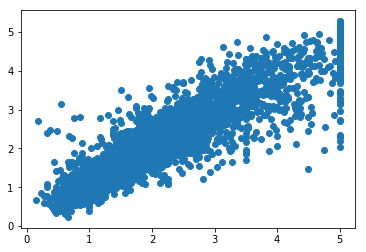

In [4]:
clf1_0 = Ridge(alpha=0.01)
clf1_1 = RandomForestRegressor(n_estimators=100,random_state=2121,n_jobs=-1)
clf1_2 = ExtraTreesRegressor(n_estimators=400,random_state=2121,n_jobs=-1)
clf1_3 = make_pipeline(MinMaxScaler(),MLPRegressor(hidden_layer_sizes=(20,20,20)))
clf1_4 = GradientBoostingRegressor(n_estimators=580,max_depth=4)

clf2_0 = Ridge(random_state=2112,alpha=0.01)

models = [[clf1_0,clf1_1,clf1_2,clf1_3,clf1_4],
         [clf2_0]]

clf = StackNetRegressor(models,folds=3,restacking=True,metric='mae',verbose=2)
clf.fit(x_train,y_train)
preds = clf.predict(x_test)
plt_sct(y_test,preds)